In [4]:
import pandas as pd
import numpy as np

In [5]:
dt = pd.read_csv("deaths.csv")

In [6]:
dt.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)  
0                                         299.477309                  
1                                         291.277967                  
2                                         278.963056                  
3                                         278.790815                  
4                                         287.162923

In [7]:
dt.rename(columns = {'Deaths - Air pollution - Sex: Both - Age: Age-standardized (Rate)':'deaths'}, inplace = True)

In [8]:
dt["deaths"].describe()

count    6468.000000
mean       87.804083
std        57.845436
min         8.401696
25%        41.016114
50%        72.653557
75%       127.607177
max       318.463253
Name: deaths, dtype: float64

In [9]:
dt.head()

Entity Code  Year      deaths
0  Afghanistan  AFG  1990  299.477309
1  Afghanistan  AFG  1991  291.277967
2  Afghanistan  AFG  1992  278.963056
3  Afghanistan  AFG  1993  278.790815
4  Afghanistan  AFG  1994  287.162923

In [10]:
people_dt = pd.read_csv("world_population.csv")

In [11]:
people_dt.head()

Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796         12486631         10752971      652230   
1          3295066          2941651          2324731       28748   
2         25518074         18739378         13795915     2381741   
3            47818            32886            27075         199   
4            53569            35611            19860         468   

   Density (per km²)  Growth Rate  World Population Percentage  
0            63.0587       1.0257                         0.52  
1            98.8702       0.9957                         0.04  
2            18.8531       1.0164                         0.56  
3           222.4774       0.9831                         0.00  
4           170.5641       1.0100                         0.00

In [12]:
people_dt.loc[people_dt["CCA3"] == "POL"].head()

Rank CCA3 Country/Territory Capital Continent  2022 Population  \
164    37  POL            Poland  Warsaw    Europe         39857145   

     2020 Population  2015 Population  2010 Population  2000 Population  \
164         38428366         38553146         38597353         38504431   

     1990 Population  1980 Population  1970 Population  Area (km²)  \
164         38064255         35521429         32482943      312679   

     Density (per km²)  Growth Rate  World Population Percentage  
164           127.4698       1.0404                          0.5

In [13]:
people_dt.rename(columns = {'2022 Population':2022, '2020 Population':2020, '2015 Population':2015, '2010 Population':2010, 
                     '2000 Population':2000, '1990 Population':1990, '1980 Population':1980, 
                     "1970 Population": 1970}, inplace = True)

In [14]:
for i in people_dt:
    print(i)

Rank
CCA3
Country/Territory
Capital
Continent
2022
2020
2015
2010
2000
1990
1980
1970
Area (km²)
Density (per km²)
Growth Rate
World Population Percentage


In [15]:
dt["people"] = None
dt["co2"] = None

In [16]:
dt.head()

Entity Code  Year      deaths people   co2
0  Afghanistan  AFG  1990  299.477309   None  None
1  Afghanistan  AFG  1991  291.277967   None  None
2  Afghanistan  AFG  1992  278.963056   None  None
3  Afghanistan  AFG  1993  278.790815   None  None
4  Afghanistan  AFG  1994  287.162923   None  None

In [17]:
dt["Year"].describe()

count    6468.000000
mean     2003.500000
std         8.078372
min      1990.000000
25%      1996.750000
50%      2003.500000
75%      2010.250000
max      2017.000000
Name: Year, dtype: float64

In [18]:
def get_years(year):
    if year > 2015:
        return 2020, 2015
    elif year == 2015:
        return 2015, 2015
    elif year > 2010:
        return 2015, 2010
    elif year == 2015:
        return 2015, 2015
    elif year > 2010:
        return 2015, 2010
    elif year == 2010:
        return 2010, 2010
    elif year > 2010:
        return 2010, 2000
    elif year == 2000:
        return 2000, 2000
    elif year > 1990:
        return 2000, 1990
    elif year == 1990:
        return 1990, 1990
    elif year > 1980:
        return 1990, 1980
    elif year == 1980:
        return 1980, 1980
    elif year > 1970:
        return 1980, 1970
    elif year == 1970:
        return 1970, 1970

In [19]:
for idx, row in dt.iterrows():
    country = row["Entity"]
    year = row["Year"]
    people_row = people_dt.loc[people_dt["Country/Territory"] == country, [2022, 2020, 2015, 2010, 2000, 1990, 1980, 1970]]
    try:
        high_year, low_year = get_years(year)
        high_pop = people_row.iloc[0][high_year]
        low_pop = people_row.iloc[0][low_year]
        year_diff = high_year - low_year
        if year_diff != 0:
            pop_diff = (high_pop - low_pop) / year_diff * (year-low_year)
            dt.at[idx, "people"] = low_pop + pop_diff
        else:
            dt.at[idx, "people"] = low_pop
    except:
        print("dupa")
dt.head(30)

dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa
dupa


Entity Code  Year      deaths       people   co2
0   Afghanistan  AFG  1990  299.477309     10694796  None
1   Afghanistan  AFG  1991  291.277967  1.15796e+07  None
2   Afghanistan  AFG  1992  278.963056  1.24644e+07  None
3   Afghanistan  AFG  1993  278.790815  1.33493e+07  None
4   Afghanistan  AFG  1994  287.162923  1.42341e+07  None
5   Afghanistan  AFG  1995  288.014224  1.51189e+07  None
6   Afghanistan  AFG  1996  286.642589  1.60037e+07  None
7   Afghanistan  AFG  1997  286.447455  1.68885e+07  None
8   Afghanistan  AFG  1998  286.265202  1.77733e+07  None
9   Afghanistan  AFG  1999  286.636018  1.86582e+07  None
10  Afghanistan  AFG  2000  283.786271     19542982  None
11  Afghanistan  AFG  2001  281.883521  2.04278e+07  None
12  Afghanistan  AFG  2002  273.337093  2.13126e+07  None
13  Afghanistan  AFG  2003  271.302907  2.21974e+07  None
14  Afghanistan  AFG  2004  269.103531  2.30823e+07  None
15  Afghanistan  AFG  2005  260.535850  2.39671e+07  None
16  Afghanistan  AFG  2006  255.175617  2.48519e+07  None
17  Afghanistan  AFG  2007  246.521270  2.57367e+07  None
18  Afghanistan  AFG  2008  237.509592  2.66215e+07  None
19  Afghanistan  AFG  2009  228.757191  2.75063e+07  None
20  Afghanistan  AFG  2010  221.525572     28189672  None
21  Afghanistan  AFG  2011  214.332694  2.93024e+07  None
22  Afghanistan  AFG  2012  207.388702  3.04152e+07  None
23  Afghanistan  AFG  2013  200.905640   3.1528e+07  None
24  Afghanistan  AFG  2014  195.436958  3.26407e+07  None
25  Afghanistan  AFG  2015  191.801119     33753499  None
26  Afghanistan  AFG  2016  186.668949  3.47972e+07  None
27  Afghanistan  AFG  2017  183.941387   3.5841e+07  None
28      Albania  ALB  1990   82.828947      3295066  None
29      Albania  ALB  1991   85.185665  3.28376e+06  None

In [20]:
print(dt["people"].count())
print(dt.describe())

5292
              Year       deaths
count  6468.000000  6468.000000
mean   2003.500000    87.804083
std       8.078372    57.845436
min    1990.000000     8.401696
25%    1996.750000    41.016114
50%    2003.500000    72.653557
75%    2010.250000   127.607177
max    2017.000000   318.463253


In [21]:
co2_df = pd.read_csv("CO2.csv")
co2_df.head(15)

Country Name        1960        1961        1962  \
0                         Aruba  204.631696  208.837879  226.081890   
1   Africa Eastern and Southern    0.906060    0.922474    0.930816   
2                   Afghanistan    0.046057    0.053589    0.073721   
3    Africa Western and Central    0.090880    0.095283    0.096612   
4                        Angola    0.100835    0.082204    0.210533   
5                       Albania    1.258195    1.374186    1.439956   
6                       Andorra         NaN         NaN         NaN   
7                    Arab World    0.609268    0.662618    0.727117   
8          United Arab Emirates    0.119037    0.109136    0.163542   
9                     Argentina    2.383343    2.458551    2.538447   
10                      Armenia         NaN         NaN         NaN   
11               American Samoa         NaN         NaN         NaN   
12          Antigua and Barbuda    0.677418    0.866667    1.838457   
13                    Australia    8.582937    8.641569    8.835688   
14                      Austria    4.373319    4.496362    4.755362   

          1963        1964        1965        1966        1967        1968  \
0   214.785217  207.626699  185.213644  172.158729  210.819017  194.917536   
1     0.940570    0.996033    1.047280    1.033908    1.052204    1.079727   
2     0.074161    0.086174    0.101285    0.107399    0.123409    0.115142   
3     0.112376    0.133258    0.184803    0.193676    0.189305    0.143989   
4     0.202739    0.213562    0.205891    0.268937    0.172096    0.289702   
5     1.181681    1.111742    1.166099    1.333055    1.363746    1.519551   
6          NaN         NaN         NaN         NaN         NaN         NaN   
7     0.853116    0.972381    1.138674    1.251997    1.316087    1.457734   
8     0.175833    0.132815    0.146822    0.160452    5.400016    6.807102   
9     2.330685    2.553442    2.656466    2.806896    2.871099    2.981777   
10         NaN         NaN         NaN         NaN         NaN         NaN   
11         NaN         NaN         NaN         NaN         NaN         NaN   
12    1.487469    1.590448    2.561321    5.814611    9.221391   15.835612   
13    9.226440    9.759073   10.622321   10.328092   10.955625   11.210168   
14    5.155194    5.391004    5.252197    5.361725    5.417737    5.711110   

    ...       2009       2010       2011       2012       2013       2014  \
0   ...        NaN        NaN        NaN        NaN        NaN        NaN   
1   ...   1.021954   1.048876   1.005338   1.021646   1.031833   1.041145   
2   ...   0.211306   0.297065   0.407074   0.335351   0.263716   0.234037   
3   ...   0.426770   0.472819   0.497023   0.490867   0.504655   0.507671   
4   ...   1.205902   1.221515   1.216317   1.204799   1.261542   1.285365   
5   ...   1.475652   1.572251   1.734823   1.579092   1.654524   1.806789   
6   ...   6.156688   6.157198   5.850886   5.944654   5.942801   5.807128   
7   ...   4.193272   4.322002   4.308741   4.512189   4.495194   4.600191   
8   ...  19.852557  19.043279  18.589933  19.223116  20.015421  19.951852   
9   ...   3.889060   4.122245   4.296015   4.277882   4.359886   4.216361   
10  ...   1.561584   1.508351   1.717343   1.983192   1.898127   1.881608   
11  ...        NaN        NaN        NaN        NaN        NaN        NaN   
12  ...  16.024348   5.566284   5.714286   7.963985   5.136051   5.185713   
13  ...  18.207425  17.581445  17.268110  16.969257  16.398646  15.755876   
14  ...   7.721144   8.365015   8.135475   7.723614   7.753700   7.253384   

         2015       2016       2017       2018  
0         NaN        NaN        NaN        NaN  
1    0.987393   0.971016   0.959978   0.933541  
2    0.232176   0.208857   0.203328   0.200151  
3    0.480743   0.472959   0.476438   0.515544  
4    1.260921   1.227703   1.034317   0.887380  
5    1.759987   1.714126   1.948872   1.939732  
6    6.026182   6.080600   6.104134   5.973405  
7    4.6

In [22]:
co2_df.describe()

1960        1961        1962        1963        1964        1965  \
count  203.000000  204.000000  206.000000  207.000000  213.000000  213.000000   
mean     3.160220    3.292338    3.462051    3.906006    4.007034    4.029132   
std     14.821169   15.114669   16.286958   16.909771   16.325047   15.139695   
min      0.007984    0.007857    0.008435    0.009336    0.011589    0.011851   
25%      0.195031    0.185078    0.211355    0.208805    0.219304    0.236942   
50%      0.616754    0.662374    0.659399    0.706050    0.793962    0.794770   
75%      2.060142    2.420962    2.526705    2.270349    2.523331    2.630170   
max    204.631696  208.837879  226.081890  214.785217  207.626699  185.213644   

             1966        1967        1968        1969  ...        2009  \
count  213.000000  213.000000  213.000000  213.000000  ...  239.000000   
mean     3.992162    4.249468    4.363587    5.240497  ...    4.494702   
std     14.054838   15.943855   14.936638   19.691750  ...    5.177846   
min      0.013248    0.011791   -0.020098    0.016104  ...    0.000000   
25%      0.258556    0.265284    0.293462    0.334922  ...    0.736515   
50%      0.885508    1.032198    1.004645    1.104632  ...    2.741639   
75%      3.202366    3.913345    4.072719    4.167117  ...    6.524149   
max    172.158729  210.819017  194.917536  253.544574  ...   34.544976   

             2010        2011        2012        2013        2014        2015  \
count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
mean     4.329083    4.315602    4.372246    4.280935    4.195690    4.148874   
std      5.006608    4.912689    4.894707    4.844110    4.732984    4.654801   
min      0.000000    0.000000    0.035207    0.042976    0.039617    0.037904   
25%      0.779051    0.798791    0.805751    0.815681    0.824377    0.806683   
50%      2.667232    2.689378    2.869867    2.695691    2.698682    2.696240   
75%      6.110808    6.188510    6.315302    6.284435    6.108660    5.920151   
max     33.544700   32.305726   33.373132   31.927018   32.693532   32.470570   

             2016        2017        2018  
count  239.000000  239.000000  239.000000  
mean     4.147100    4.154185    4.158613  
std      4.592901    4.575980    4.547079  
min      0.026146    0.028010    0.026169  
25%      0.818367    0.851900    0.827804  
50%      2.754968    2.667119    2.691814  
75%      5.836392    6.158644    6.069018  
max     32.128042   32.179371   32.415639  

[8 rows x 59 columns]

In [23]:
co2_df["Country Name"].describe()

count                                                   266
unique                                                  266
top       Latin America & the Caribbean (IDA & IBRD coun...
freq                                                      1
Name: Country Name, dtype: object

In [24]:
for idx, row in dt.iterrows():
    try:
        country = row["Entity"]
        year = row["Year"]
        co2_row = co2_df.loc[co2_df["Country Name"] == country]
        print(co2_row)
        co2 = co2_row.iloc[0][str(year)]
        dt.at[idx, "co2"] = co2
    except:
        print(co2_row)
dt.head(30)

  Country Name      1960      1961      1962      1963      1964      1965  \
2  Afghanistan  0.046057  0.053589  0.073721  0.074161  0.086174  0.101285   

       1966      1967      1968  ...      2009      2010      2011      2012  \
2  0.107399  0.123409  0.115142  ...  0.211306  0.297065  0.407074  0.335351   

       2013      2014      2015      2016      2017      2018  
2  0.263716  0.234037  0.232176  0.208857  0.203328  0.200151  

[1 rows x 60 columns]
  Country Name      1960      1961      1962      1963      1964      1965  \
2  Afghanistan  0.046057  0.053589  0.073721  0.074161  0.086174  0.101285   

       1966      1967      1968  ...      2009      2010      2011      2012  \
2  0.107399  0.123409  0.115142  ...  0.211306  0.297065  0.407074  0.335351   

       2013      2014      2015      2016      2017      2018  
2  0.263716  0.234037  0.232176  0.208857  0.203328  0.200151  

[1 rows x 60 columns]
  Country Name      1960      1961      1962      1963      19

  Country Name      1960      1961      1962      1963      1964      1965  \
5      Albania  1.258195  1.374186  1.439956  1.181681  1.111742  1.166099   

       1966      1967      1968  ...      2009      2010      2011      2012  \
5  1.333055  1.363746  1.519551  ...  1.475652  1.572251  1.734823  1.579092   

       2013      2014      2015      2016      2017      2018  
5  1.654524  1.806789  1.759987  1.714126  1.948872  1.939732  

[1 rows x 60 columns]
  Country Name      1960      1961      1962      1963      1964      1965  \
5      Albania  1.258195  1.374186  1.439956  1.181681  1.111742  1.166099   

       1966      1967      1968  ...      2009      2010      2011      2012  \
5  1.333055  1.363746  1.519551  ...  1.475652  1.572251  1.734823  1.579092   

       2013      2014      2015      2016      2017      2018  
5  1.654524  1.806789  1.759987  1.714126  1.948872  1.939732  

[1 rows x 60 columns]
  Country Name      1960      1961      1962      1963      19

[1 rows x 60 columns]
           Country Name      1960      1961      1962      1963      1964  \
12  Antigua and Barbuda  0.677418  0.866667  1.838457  1.487469  1.590448   

        1965      1966      1967       1968  ...       2009      2010  \
12  2.561321  5.814611  9.221391  15.835612  ...  16.024348  5.566284   

        2011      2012      2013      2014      2015      2016      2017  \
12  5.714286  7.963985  5.136051  5.185713  5.236665  5.289886  5.239717   

        2018  
12  5.504663  

[1 rows x 60 columns]
           Country Name      1960      1961      1962      1963      1964  \
12  Antigua and Barbuda  0.677418  0.866667  1.838457  1.487469  1.590448   

        1965      1966      1967       1968  ...       2009      2010  \
12  2.561321  5.814611  9.221391  15.835612  ...  16.024348  5.566284   

        2011      2012      2013      2014      2015      2016      2017  \
12  5.714286  7.963985  5.136051  5.185713  5.236665  5.289886  5.239717   

        2018  


[1 rows x 60 columns]
   Country Name      1960      1961      1962     1963      1964       1965  \
13    Australia  8.582937  8.641569  8.835688  9.22644  9.759073  10.622321   

         1966       1967       1968  ...       2009       2010      2011  \
13  10.328092  10.955625  11.210168  ...  18.207425  17.581445  17.26811   

         2012       2013       2014       2015      2016       2017       2018  
13  16.969257  16.398646  15.755876  15.786449  15.87208  15.738647  15.475516  

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963      1964      1965  \
14      Austria  4.373319  4.496362  4.755362  5.155194  5.391004  5.252197   

        1966      1967     1968  ...      2009      2010      2011      2012  \
14  5.361725  5.417737  5.71111  ...  7.721144  8.365015  8.135475  7.723614   

      2013      2014      2015      2016      2017      2018  
14  7.7537  7.253384  7.306745  7.255627  7.482751  7.146638  

[1 rows x 60 columns]
   Country N

Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977

[1 rows x 60 columns]
   Country Name      1960       1961      1962       1963       1964  \
17      Belgium  9.941594  10.103872  10.64119  11.386929  11.053655   

         1965       1966       1967       1968  ...      2009      2010  \
17  11.141656  11.042019  11.217257  12.325687  ...  9.231701  9.771847   

        2011      2012     2013      2014      2015      2016      2017  \
17  8.658064  8.549616  8.65727  8.043496  8.444061  8.323757  8.155491   

        2018  
17  8.179711  

[1 rows x 60 columns]
   Country Name      1960       1961      1962       1963       1964  \
17      Belgium  9.941594  10.103872  10.64119  11.386929  11.053655   

         1965       1966       1967       1968  ...      2009      2010  \
17  11.141656  11.042019  11.217257  12.325687  ...  9.231701  9.771847   

        2011      2012     2013      2014      2015      2016      2017  \
17  8.658064  8.549616  8.65727  8.043496  8.444061  8.323757  8.155491   

        2018  
17  8.179711  



   Country Name      1960      1961      1962      1963      1964      1965  \
18        Benin  0.066354  0.052049  0.054209  0.047588  0.055304  0.057115   

        1966      1967      1968  ...     2009      2010      2011     2012  \
18  0.042383  0.052284  0.055171  ...  0.52545  0.552219  0.526381  0.48719   

        2013      2014      2015      2016      2017      2018  
18  0.501769  0.535636  0.566379  0.665007  0.658602  0.688722  

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963      1964      1965  \
18        Benin  0.066354  0.052049  0.054209  0.047588  0.055304  0.057115   

        1966      1967      1968  ...     2009      2010      2011     2012  \
18  0.042383  0.052284  0.055171  ...  0.52545  0.552219  0.526381  0.48719   

        2013      2014      2015      2016      2017      2018  
18  0.501769  0.535636  0.566379  0.665007  0.658602  0.688722  

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963   

[1 rows x 60 columns]
   Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
32       Bhutan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

        2009      2010      2011      2012      2013      2014     2015  \
32  0.545458  0.685629  0.966397  1.083266  1.196787  1.307275  1.31889   

        2016      2017      2018  
32  1.669594  1.783887  1.829278  

[1 rows x 60 columns]
   Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
32       Bhutan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

        2009      2010      2011      2012      2013      2014     2015  \
32  0.545458  0.685629  0.966397  1.083266  1.196787  1.307275  1.31889   

        2016      2017      2018  
32  1.669594  1.783887  1.829278  

[1 rows x 60 columns]
   Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
32       Bhutan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

        2009      2

              Country Name  1960  1961  1962  1963  1964  1965  1966  1967  \
24  Bosnia and Herzegovina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    1968  ...      2009      2010      2011      2012     2013      2014  \
24   NaN  ...  5.511323  5.624106  6.484261  6.091587  6.16779  5.597187   

        2015      2016      2017      2018  
24  5.718265  6.597243  6.758099  6.781132  

[1 rows x 60 columns]
              Country Name  1960  1961  1962  1963  1964  1965  1966  1967  \
24  Bosnia and Herzegovina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    1968  ...      2009      2010      2011      2012     2013      2014  \
24   NaN  ...  5.511323  5.624106  6.484261  6.091587  6.16779  5.597187   

        2015      2016      2017      2018  
24  5.718265  6.597243  6.758099  6.781132  

[1 rows x 60 columns]
              Country Name  1960  1961  1962  1963  1964  1965  1966  1967  \
24  Bosnia and Herzegovina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 60 columns]
   Country Name      1960      1961      1962     1963      1964      1965  \
29       Brazil  0.649886  0.662131  0.701775  0.70605  0.699884  0.676455   

        1966      1967      1968  ...      2009      2010      2011      2012  \
29  0.750375  0.751887  0.856554  ...  1.809461  2.032204  2.111845  2.266878   

       2013      2014      2015      2016      2017      2018  
29  2.40186  2.499362  2.347366  2.143498  2.164422  2.041874  

[1 rows x 60 columns]
   Country Name      1960      1961      1962     1963      1964      1965  \
29       Brazil  0.649886  0.662131  0.701775  0.70605  0.699884  0.676455   

        1966      1967      1968  ...      2009      2010      2011      2012  \
29  0.750375  0.751887  0.856554  ...  1.809461  2.032204  2.111845  2.266878   

       2013      2014      2015      2016      2017      2018  
29  2.40186  2.499362  2.347366  2.143498  2.164422  2.041874  

[1 rows x 60 columns]
   Country Name      1960      1961 

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 

   Country Name      1960     1961      1962      1963      1964      1965  \
21     Bulgaria  2.833901  3.26992  3.835892  4.259781  5.262988  5.645652   

        1966      1967      1968  ...      2009      2010      2011      2012  \
21  5.905437  6.638369  7.112214  ...  5.772091  6.064418  6.759361  6.175841   

        2013      2014      2015      2016      2017      2018  
21  5.480987  5.845842  6.225976  5.855926  6.223902  5.854773  

[1 rows x 60 columns]
   Country Name      1960     1961      1962      1963      1964      1965  \
21     Bulgaria  2.833901  3.26992  3.835892  4.259781  5.262988  5.645652   

        1966      1967      1968  ...      2009      2010      2011      2012  \
21  5.905437  6.638369  7.112214  ...  5.772091  6.064418  6.759361  6.175841   

        2013      2014      2015      2016      2017      2018  
21  5.480987  5.845842  6.225976  5.855926  6.223902  5.854773  

[1 rows x 60 columns]
   Country Name      1960     1961      1962      1963

[1 rows x 60 columns]
   Country Name  1960  1961      1962      1963      1964      1965      1966  \
16      Burundi   NaN   NaN  0.015136  0.016081  0.015752  0.011851  0.015036   

        1967      1968  ...      2009      2010      2011     2012      2013  \
16  0.014654  0.016484  ...  0.023816  0.036885  0.041302  0.04218  0.042976   

        2014      2015     2016      2017      2018  
16  0.039617  0.040354  0.04386  0.052646  0.052795  

[1 rows x 60 columns]
   Country Name  1960  1961      1962      1963      1964      1965      1966  \
16      Burundi   NaN   NaN  0.015136  0.016081  0.015752  0.011851  0.015036   

        1967      1968  ...      2009      2010      2011     2012      2013  \
16  0.014654  0.016484  ...  0.023816  0.036885  0.041302  0.04218  0.042976   

        2014      2015     2016      2017      2018  
16  0.039617  0.040354  0.04386  0.052646  0.052795  

[1 rows x 60 columns]
   Country Name  1960  1961      1962      1963      1964      1965 

    Country Name      1960      1961      1962     1963      1964      1965  \
123     Cambodia  0.041012  0.048702  0.051096  0.06286  0.053863  0.062372   

         1966      1967      1968  ...      2009      2010      2011  \
123  0.071279  0.062525  0.072477  ...  0.335613  0.343763  0.356911   

         2012      2013      2014      2015      2016      2017      2018  
123  0.366701  0.371348  0.434057  0.552784  0.627922  0.710207  0.686778  

[1 rows x 60 columns]
    Country Name      1960      1961      1962     1963      1964      1965  \
123     Cambodia  0.041012  0.048702  0.051096  0.06286  0.053863  0.062372   

         1966      1967      1968  ...      2009      2010      2011  \
123  0.071279  0.062525  0.072477  ...  0.335613  0.343763  0.356911   

         2012      2013      2014      2015      2016      2017      2018  
123  0.366701  0.371348  0.434057  0.552784  0.627922  0.710207  0.686778  

[1 rows x 60 columns]
    Country Name      1960      1961      

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963      1964      1965  \
42     Cameroon  0.052417  0.053426  0.053659  0.054492  0.059784  0.053987   

        1966      1967      1968  ...      2009      2010      2011      2012  \
42  0.058326  0.075734  0.081602  ...  0.444165  0.441959  0.381223  0.328597   

        2013      2014      2015      2016      2017      2018  
42  0.333827  0.341683  0.343801  0.357344  0.338679  0.341843  

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963      1964      1965  \
42     Cameroon  0.052417  0.053426  0.053659  0.054492  0.059784  0.053987   

        1966      1967      1968  ...      2009      2010      2011      2012  \
42  0.058326  0.075734  0.081602  ...  0.444165  0.441959  0.381223  0.328597   

        2013      2014      2015      2016      2017      2018  
42  0.333827  0.341683  0.343801  0.357344  0.338679  0.341843  

[1 rows x 60 columns]
   Country Name      1960   

                Country Name      1960     1961      1962      1963      1964  \
34  Central African Republic  0.058607  0.05767  0.047258  0.046436  0.045592   

        1965      1966      1967     1968  ...      2009      2010      2011  \
34  0.053673  0.050412  0.053664  0.10512  ...  0.059941  0.061549  0.065631   

        2012      2013      2014      2015      2016     2017      2018  
34  0.067622  0.067447  0.067202  0.068994  0.068317  0.06745  0.070719  

[1 rows x 60 columns]
                Country Name      1960     1961      1962      1963      1964  \
34  Central African Republic  0.058607  0.05767  0.047258  0.046436  0.045592   

        1965      1966      1967     1968  ...      2009      2010      2011  \
34  0.053673  0.050412  0.053664  0.10512  ...  0.059941  0.061549  0.065631   

        2012      2013      2014      2015      2016     2017      2018  
34  0.067622  0.067447  0.067202  0.068994  0.068317  0.06745  0.070719  

[1 rows x 60 columns]
          

Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963      1964      1965  \
40        China  1.170381  0.836047  0.661428  0.640002  0.625646  0.665524   

        1966      1967      1968  ...      2009      2010      2011      2012  \
40  0.710891  0.574162  0.605452  ...  5.795344  6.332166  6.902792  7.058003   

        2013      2014      2015      2016      2017      2018  
40  7.320485  7.252919  7.169112  7.118705  7.225769  7.405211  

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963      1964      1965  \
40        China  1.170381  0.836047  0.661428  0.640002  0.625646  0.665524   

        1966      1967      1968  ...      2009      2010      2011      2012  \
40  0.710891  0.574162  0.605452  ...  5.795344  6.332166  6.902792  7.058003   

        2013      2014      2015      2016      2017      2018  
40  7.320485  7.252919  7.169112  7.118705  7.225769  7.405211  

[1 rows x 60 columns]
   Country Name      1960   

   Country Name     1960      1961      1962      1963      1964      1965  \
46      Comoros  0.05756  0.056663  0.055785  0.054903  0.053989  0.070713   

      1966      1967      1968  ...      2009      2010      2011      2012  \
46  0.0867  0.084924  0.083124  ...  0.193093  0.231986  0.212291  0.207221   

        2013      2014      2015      2016      2017      2018  
46  0.242748  0.210695  0.231531  0.251384  0.307167  0.312379  

[1 rows x 60 columns]
   Country Name     1960      1961      1962      1963      1964      1965  \
46      Comoros  0.05756  0.056663  0.055785  0.054903  0.053989  0.070713   

      1966      1967      1968  ...      2009      2010      2011      2012  \
46  0.0867  0.084924  0.083124  ...  0.193093  0.231986  0.212291  0.207221   

        2013      2014      2015      2016      2017      2018  
46  0.242748  0.210695  0.231531  0.251384  0.307167  0.312379  

[1 rows x 60 columns]
   Country Name     1960      1961      1962      1963      19

     Country Name      1960      1961      1962      1963      1964      1965  \
41  Cote d'Ivoire  0.131878  0.152474  0.155597  0.159084  0.187339  0.277616   

        1966      1967      1968  ...      2009      2010      2011      2012  \
41  0.295286  0.327629  0.374237  ...  0.295626  0.302928  0.284849  0.366173   

        2013      2014      2015      2016      2017      2018  
41  0.383022  0.395626  0.411605  0.391223  0.424757  0.395305  

[1 rows x 60 columns]
     Country Name      1960      1961      1962      1963      1964      1965  \
41  Cote d'Ivoire  0.131878  0.152474  0.155597  0.159084  0.187339  0.277616   

        1966      1967      1968  ...      2009      2010      2011      2012  \
41  0.295286  0.327629  0.374237  ...  0.295626  0.302928  0.284849  0.366173   

        2013      2014      2015      2016      2017      2018  
41  0.383022  0.395626  0.411605  0.391223  0.424757  0.395305  

[1 rows x 60 columns]
     Country Name      1960      1961     

[1 rows x 60 columns]
   Country Name      1960     1961      1962      1963      1964      1965  \
50         Cuba  1.918422  1.67075  1.901016  1.710526  1.834145  1.835765   

       1966      1967      1968  ...      2009      2010      2011      2012  \
50  1.87112  1.905281  1.905948  ...  2.413886  2.695568  2.539898  2.562824   

       2013      2014      2015      2016      2017    2018  
50  2.42406  2.377308  2.427421  2.509901  2.262053  2.2023  

[1 rows x 60 columns]
   Country Name      1960     1961      1962      1963      1964      1965  \
50         Cuba  1.918422  1.67075  1.901016  1.710526  1.834145  1.835765   

       1966      1967      1968  ...      2009      2010      2011      2012  \
50  1.87112  1.905281  1.905948  ...  2.413886  2.695568  2.539898  2.562824   

       2013      2014      2015      2016      2017    2018  
50  2.42406  2.377308  2.427421  2.509901  2.262053  2.2023  

[1 rows x 60 columns]
   Country Name      1960     1961      1962    

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963      1964      1965  \
56     Djibouti  0.482304  0.497203  0.506045  0.656006  0.783969  1.052489   

        1966      1967      1968  ...      2009      2010      2011      2012  \
56  1.134038  0.669746  0.861521  ...  0.555676  0.618905  0.562278  0.587466   

        2013      2014      2015      2016      2017     2018  
56  0.633989  0.511846  0.590811  0.527382  0.497829  0.51099  

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963      1964      1965  \
56     Djibouti  0.482304  0.497203  0.506045  0.656006  0.783969  1.052489   

        1966      1967      1968  ...      2009      2010      2011      2012  \
56  1.134038  0.669746  0.861521  ...  0.555676  0.618905  0.562278  0.587466   

        2013      2014      2015      2016      2017     2018  
56  0.633989  0.511846  0.590811  0.527382  0.497829  0.51099  

[1 rows x 60 columns]
   Country Name      1960      1

Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977

Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977

[1 rows x 60 columns]
   Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
71      Estonia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2009       2010       2011       2012       2013       2014  \
71  11.210065  14.179763  13.597612  12.686211  14.559972  13.556021   

         2015       2016       2017       2018  
71  11.684596  11.893995  12.357824  12.103085  

[1 rows x 60 columns]
   Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
71      Estonia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2009       2010       2011       2012       2013       2014  \
71  11.210065  14.179763  13.597612  12.686211  14.559972  13.556021   

         2015       2016       2017       2018  
71  11.684596  11.893995  12.357824  12.103085  

[1 rows x 60 columns]
   Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
71      Estonia   NaN   NaN   NaN   NaN   NaN   NaN   

[1 rows x 60 columns]
    Country Name      1960     1961  1962  1963     1964      1965      1966  \
224     Eswatini  0.098055  0.01068   NaN   NaN  0.03013  0.215749  0.525468   

        1967      1968  ...      2009      2010      2011      2012      2013  \
224  0.57593  0.685576  ...  1.011857  0.948498  0.951467  0.982132  1.426149   

         2014      2015      2016      2017      2018  
224  0.876695  0.932939  1.104135  0.924602  0.959276  

[1 rows x 60 columns]
    Country Name      1960     1961  1962  1963     1964      1965      1966  \
224     Eswatini  0.098055  0.01068   NaN   NaN  0.03013  0.215749  0.525468   

        1967      1968  ...      2009      2010      2011      2012      2013  \
224  0.57593  0.685576  ...  1.011857  0.948498  0.951467  0.982132  1.426149   

         2014      2015      2016      2017      2018  
224  0.876695  0.932939  1.104135  0.924602  0.959276  

[1 rows x 60 columns]
    Country Name      1960     1961  1962  1963     1964    

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963     1964      1965  \
75      Finland  3.409847  3.348877  3.742567  4.279631  5.02419  5.549837   

       1966      1967     1968  ...       2009       2010       2011  \
75  6.44405  6.213387  7.20089  ...  10.148213  11.658754  10.229625   

        2012      2013      2014      2015      2016      2017      2018  
75  9.126388  9.227847  8.451872  7.814537  8.318013  7.808339  8.042752  

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963     1964      1965  \
75      Finland  3.409847  3.348877  3.742567  4.279631  5.02419  5.549837   

       1966      1967     1968  ...       2009       2010       2011  \
75  6.44405  6.213387  7.20089  ...  10.148213  11.658754  10.229625   

        2012      2013      2014      2015      2016      2017      2018  
75  9.126388  9.227847  8.451872  7.814537  8.318013  7.808339  8.042752  

[1 rows x 60 columns]
   Country Name      1960   

Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977

[1 rows x 60 columns]
   Country Name     1960      1961      1962      1963      1964     1965  \
83        Ghana  0.22051  0.196515  0.202744  0.236091  0.219304  0.22032   

       1966      1967      1968  ...      2009      2010      2011      2012  \
83  0.18147  0.183963  0.211953  ...  0.411651  0.449967  0.480941  0.546998   

        2013      2014      2015      2016      2017      2018  
83  0.564124  0.527834  0.543283  0.495402  0.507529  0.541201  

[1 rows x 60 columns]
   Country Name     1960      1961      1962      1963      1964     1965  \
83        Ghana  0.22051  0.196515  0.202744  0.236091  0.219304  0.22032   

       1966      1967      1968  ...      2009      2010      2011      2012  \
83  0.18147  0.183963  0.211953  ...  0.411651  0.449967  0.480941  0.546998   

        2013      2014      2015      2016      2017      2018  
83  0.564124  0.527834  0.543283  0.495402  0.507529  0.541201  

[1 rows x 60 columns]
   Country Name     1960      1961      

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963     1964      1965  \
92    Guatemala  0.325945  0.331175  0.315731  0.337546  0.38165  0.413931   

        1966      1967      1968  ...      2009      2010      2011      2012  \
92  0.354693  0.393041  0.413096  ...  0.846417  0.802963  0.808456  0.821949   

        2013      2014      2015     2016      2017      2018  
92  0.864798  0.911388  1.049628  1.10313  1.026268  1.113969  

[1 rows x 60 columns]
   Country Name      1960      1961      1962      1963     1964      1965  \
92    Guatemala  0.325945  0.331175  0.315731  0.337546  0.38165  0.413931   

        1966      1967      1968  ...      2009      2010      2011      2012  \
92  0.354693  0.393041  0.413096  ...  0.846417  0.802963  0.808456  0.821949   

        2013      2014      2015     2016      2017      2018  
92  0.864798  0.911388  1.049628  1.10313  1.026268  1.113969  

[1 rows x 60 columns]
   Country Name      1960      1961 

     Country Name      1960      1961      1962      1963      1964     1965  \
87  Guinea-Bissau  0.029758  0.047107  0.064141  0.075071  0.091415  0.10158   

        1966      1967      1968  ...      2009      2010      2011      2012  \
87  0.100161  0.071231  0.091617  ...  0.154995  0.157625  0.159949  0.155765   

        2013      2014      2015      2016      2017      2018  
87  0.157742  0.165442  0.161178  0.168309  0.164101  0.165395  

[1 rows x 60 columns]
     Country Name      1960      1961      1962      1963      1964     1965  \
87  Guinea-Bissau  0.029758  0.047107  0.064141  0.075071  0.091415  0.10158   

        1966      1967      1968  ...      2009      2010      2011      2012  \
87  0.100161  0.071231  0.091617  ...  0.154995  0.157625  0.159949  0.155765   

        2013      2014      2015      2016      2017      2018  
87  0.157742  0.165442  0.161178  0.168309  0.164101  0.165395  

[1 rows x 60 columns]
     Country Name      1960      1961      196

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 

[1 rows x 60 columns]
    Country Name      1960      1961    1962      1963      1964      1965  \
115       Israel  3.059852  3.235687  3.4639  3.451203  3.696632  5.050531   

         1966      1967      1968  ...      2009      2010      2011  \
115  5.172018  4.933417  4.926836  ...  8.779523  9.248911  8.990703   

         2012      2013      2014      2015      2016      2017      2018  
115  9.615069  8.313171  7.876383  7.892507  7.636321  7.579218  6.976404  

[1 rows x 60 columns]
    Country Name      1960      1961    1962      1963      1964      1965  \
115       Israel  3.059852  3.235687  3.4639  3.451203  3.696632  5.050531   

         1966      1967      1968  ...      2009      2010      2011  \
115  5.172018  4.933417  4.926836  ...  8.779523  9.248911  8.990703   

         2012      2013      2014      2015      2016      2017      2018  
115  9.615069  8.313171  7.876383  7.892507  7.636321  7.579218  6.976404  

[1 rows x 60 columns]
    Country Name      19

    Country Name      1960      1961      1962      1963      1964      1965  \
117      Jamaica  0.902945  1.290394  1.264256  1.407686  2.349692  1.703535   

         1966      1967      1968  ...      2009      2010      2011  \
117  1.977128  2.145308  2.126847  ...  2.818474  2.661482  2.689378   

         2012      2013     2014      2015      2016      2017      2018  
117  2.501647  2.651546  2.57379  2.521598  2.666674  2.461614  2.899634  

[1 rows x 60 columns]
    Country Name      1960      1961      1962      1963      1964      1965  \
117      Jamaica  0.902945  1.290394  1.264256  1.407686  2.349692  1.703535   

         1966      1967      1968  ...      2009      2010      2011  \
117  1.977128  2.145308  2.126847  ...  2.818474  2.661482  2.689378   

         2012      2013     2014      2015      2016      2017      2018  
117  2.501647  2.651546  2.57379  2.521598  2.666674  2.461614  2.899634  

[1 rows x 60 columns]
    Country Name      1960      1961      

[1 rows x 60 columns]
    Country Name     1960      1961      1962      1963      1964      1965  \
118       Jordan  0.79777  1.005242  1.037713  1.162728  1.127638  1.212332   

         1966      1967      1968  ...      2009      2010      2011  \
118  1.250249  1.026445  1.004645  ...  2.997131  2.781779  2.709172   

         2012      2013      2014      2015      2016      2017      2018  
118  2.981472  2.793758  2.869213  2.736718  2.601974  2.667119  2.478595  

[1 rows x 60 columns]
    Country Name     1960      1961      1962      1963      1964      1965  \
118       Jordan  0.79777  1.005242  1.037713  1.162728  1.127638  1.212332   

         1966      1967      1968  ...      2009      2010      2011  \
118  1.250249  1.026445  1.004645  ...  2.997131  2.781779  2.709172   

         2012      2013      2014      2015      2016      2017      2018  
118  2.981472  2.793758  2.869213  2.736718  2.601974  2.667119  2.478595  

[1 rows x 60 columns]
    Country Name    

[1 rows x 60 columns]
    Country Name      1960    1961     1962      1963      1964      1965  \
121        Kenya  0.298957  0.2867  0.30364  0.319941  0.306554  0.258956   

         1966      1967      1968  ...      2009      2010      2011  \
121  0.272472  0.265284  0.267547  ...  0.286295  0.300733  0.301772   

         2012      2013      2014      2015      2016      2017      2018  
121  0.273546  0.309754  0.321841  0.356946  0.382659  0.376136  0.358028  

[1 rows x 60 columns]
    Country Name      1960    1961     1962      1963      1964      1965  \
121        Kenya  0.298957  0.2867  0.30364  0.319941  0.306554  0.258956   

         1966      1967      1968  ...      2009      2010      2011  \
121  0.272472  0.265284  0.267547  ...  0.286295  0.300733  0.301772   

         2012      2013      2014      2015      2016      2017      2018  
121  0.273546  0.309754  0.321841  0.356946  0.382659  0.376136  0.358028  

[1 rows x 60 columns]
    Country Name      1960  

    Country Name       1960       1961       1962       1963       1964  \
127       Kuwait  29.006029  33.207601  42.360956  44.952109  59.767169   

          1965       1966       1967       1968  ...      2009       2010  \
127  75.036339  67.190262  44.080445  35.458445  ...  26.60011  26.154089   

         2011       2012       2013       2014       2015      2016  \
127  25.61825  24.960793  24.177755  22.644644  22.953456  22.71497   

          2017       2018  
127  22.119759  21.622724  

[1 rows x 60 columns]
    Country Name       1960       1961       1962       1963       1964  \
127       Kuwait  29.006029  33.207601  42.360956  44.952109  59.767169   

          1965       1966       1967       1968  ...      2009       2010  \
127  75.036339  67.190262  44.080445  35.458445  ...  26.60011  26.154089   

         2011       2012       2013       2014       2015      2016  \
127  25.61825  24.960793  24.177755  22.644644  22.953456  22.71497   

          2017       20

[1 rows x 60 columns]
    Country Name      1960      1961      1962      1963     1964      1965  \
130      Lebanon  1.430283  1.439572  1.483717  1.525916  1.60065  1.586062   

         1966      1967      1968  ...      2009      2010      2011  \
130  1.699102  1.642344  1.673627  ...  4.554307  4.215572  4.071494   

         2012      2013     2014     2015      2016     2017      2018  
130  4.240089  3.930312  3.98336  4.14072  4.141918  4.29365  4.039707  

[1 rows x 60 columns]
    Country Name      1960      1961      1962      1963     1964      1965  \
130      Lebanon  1.430283  1.439572  1.483717  1.525916  1.60065  1.586062   

         1966      1967      1968  ...      2009      2010      2011  \
130  1.699102  1.642344  1.673627  ...  4.554307  4.215572  4.071494   

         2012      2013     2014     2015      2016     2017      2018  
130  4.240089  3.930312  3.98336  4.14072  4.141918  4.29365  4.039707  

[1 rows x 60 columns]
    Country Name      1960      

[1 rows x 60 columns]
    Country Name      1960      1961     1962      1963     1964      1965  \
131      Liberia  0.147512  0.141248  0.21688  0.298456  0.39744  0.447661   

         1966      1967      1968  ...      2009      2010      2011  \
131  0.480887  0.469972  0.662489  ...  0.143842  0.187595  0.211577   

         2012      2013      2014      2015      2016      2017      2018  
131  0.229709  0.214201  0.279848  0.281739  0.307405  0.267958  0.273917  

[1 rows x 60 columns]
    Country Name      1960      1961     1962      1963     1964      1965  \
131      Liberia  0.147512  0.141248  0.21688  0.298456  0.39744  0.447661   

         1966      1967      1968  ...      2009      2010      2011  \
131  0.480887  0.469972  0.662489  ...  0.143842  0.187595  0.211577   

         2012      2013      2014      2015      2016      2017      2018  
131  0.229709  0.214201  0.279848  0.281739  0.307405  0.267958  0.273917  

[1 rows x 60 columns]
    Country Name      19

[1 rows x 60 columns]
    Country Name       1960       1961       1962       1963      1964  \
144   Luxembourg  36.685183  36.583778  36.012627  35.323585  37.54829   

          1965       1966       1967       1968  ...       2009       2010  \
144  36.813804  34.803525  33.912046  36.533518  ...  21.013172  21.816618   

          2011       2012       2013       2014      2015       2016  \
144  21.086261  20.133874  18.680065  17.346163  16.02868  15.223002   

          2017       2018  
144  15.092163  15.330208  

[1 rows x 60 columns]
    Country Name       1960       1961       1962       1963      1964  \
144   Luxembourg  36.685183  36.583778  36.012627  35.323585  37.54829   

          1965       1966       1967       1968  ...       2009       2010  \
144  36.813804  34.803525  33.912046  36.533518  ...  21.013172  21.816618   

          2011       2012       2013       2014      2015       2016  \
144  21.086261  20.133874  18.680065  17.346163  16.02868  15.223002  

    Country Name     1960      1961      1962    1963      1964     1965  \
169     Malaysia  0.43745  0.475265  0.468693  0.5537  0.694262  0.68093   

         1966      1967      1968  ...      2009      2010      2011  \
169  0.785833  0.843901  0.826483  ...  6.526762  7.058629  7.038856   

         2012      2013      2014      2015      2016      2017     2018  
169  6.993212  7.459384  7.757159  7.682279  7.451282  7.165808  7.60022  

[1 rows x 60 columns]
    Country Name     1960      1961      1962    1963      1964     1965  \
169     Malaysia  0.43745  0.475265  0.468693  0.5537  0.694262  0.68093   

         1966      1967      1968  ...      2009      2010      2011  \
169  0.785833  0.843901  0.826483  ...  6.526762  7.058629  7.038856   

         2012      2013      2014      2015      2016      2017     2018  
169  6.993212  7.459384  7.757159  7.682279  7.451282  7.165808  7.60022  

[1 rows x 60 columns]
    Country Name     1960      1961      1962    1963     

[1 rows x 60 columns]
    Country Name      1960      1961      1962      1963    1964      1965  \
167    Mauritius  0.272515  0.274719  0.361281  0.290764  0.4183  0.404198   

         1966     1967      1968  ...      2009      2010     2011      2012  \
167  0.357727  0.63618  0.799158  ...  2.741639  2.927063  2.90641  2.970024   

         2013      2014      2015      2016      2017     2018  
167  3.034991  3.132599  3.136373  3.197536  3.305359  3.26404  

[1 rows x 60 columns]
    Country Name      1960      1961      1962      1963    1964      1965  \
167    Mauritius  0.272515  0.274719  0.361281  0.290764  0.4183  0.404198   

         1966     1967      1968  ...      2009      2010     2011      2012  \
167  0.357727  0.63618  0.799158  ...  2.741639  2.927063  2.90641  2.970024   

         2013      2014      2015      2016      2017     2018  
167  3.034991  3.132599  3.136373  3.197536  3.305359  3.26404  

[1 rows x 60 columns]
    Country Name      1960      1961

[1 rows x 60 columns]
    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
150      Moldova   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2009     2010      2011      2012      2013      2014      2015  \
150  2.667276  2.90059  2.919751  2.846693  2.511638  2.698682  2.829393   

         2016      2017      2018  
150  2.904892  2.961718  3.171832  

[1 rows x 60 columns]
    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
150      Moldova   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2009     2010      2011      2012      2013      2014      2015  \
150  2.667276  2.90059  2.919751  2.846693  2.511638  2.698682  2.829393   

         2016      2017      2018  
150  2.904892  2.961718  3.171832  

[1 rows x 60 columns]
    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
150      Moldova   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     

    Country Name      1960      1961      1962      1963      1964      1965  \
160      Myanmar  0.125006  0.116721  0.126985  0.113654  0.120596  0.112462   

         1966      1967      1968  ...     2009      2010      2011      2012  \
160  0.113154  0.142437  0.112624  ...  0.15184  0.163634  0.168266  0.229316   

        2013      2014      2015      2016      2017      2018  
160  0.26209  0.325932  0.360853  0.412667  0.588208  0.605493  

[1 rows x 60 columns]
    Country Name      1960      1961      1962      1963      1964      1965  \
160      Myanmar  0.125006  0.116721  0.126985  0.113654  0.120596  0.112462   

         1966      1967      1968  ...     2009      2010      2011      2012  \
160  0.113154  0.142437  0.112624  ...  0.15184  0.163634  0.168266  0.229316   

        2013      2014      2015      2016      2017      2018  
160  0.26209  0.325932  0.360853  0.412667  0.588208  0.605493  

[1 rows x 60 columns]
    Country Name      1960      1961      1962

    Country Name     1960      1961      1962      1963      1964      1965  \
176  Netherlands  6.39918  6.520358  7.060854  7.623925  7.987673  8.174054   

         1966      1967      1968  ...      2009      2010      2011  \
176  8.321532  8.476055  8.920252  ...  9.711811  10.30129  9.517121   

         2012      2013      2014      2015      2016      2017      2018  
176  9.401394  9.349914  8.887633  9.333573  9.293428  9.100888  8.772824  

[1 rows x 60 columns]
    Country Name     1960      1961      1962      1963      1964      1965  \
176  Netherlands  6.39918  6.520358  7.060854  7.623925  7.987673  8.174054   

         1966      1967      1968  ...      2009      2010      2011  \
176  8.321532  8.476055  8.920252  ...  9.711811  10.30129  9.517121   

         2012      2013      2014      2015      2016      2017      2018  
176  9.401394  9.349914  8.887633  9.333573  9.293428  9.100888  8.772824  

[1 rows x 60 columns]
    Country Name     1960      1961      1

    Country Name      1960      1961      1962      1963      1964      1965  \
173        Niger  0.008657  0.015777  0.018395  0.023825  0.025072  0.023422   

         1966      1967     1968  ...      2009      2010      2011      2012  \
173  0.033684  0.031852  0.03784  ...  0.068168  0.083212  0.082385  0.106208   

         2013     2014      2015      2016      2017      2018  
173  0.096734  0.10291  0.098492  0.094763  0.095823  0.102037  

[1 rows x 60 columns]
    Country Name      1960      1961      1962      1963      1964      1965  \
173        Niger  0.008657  0.015777  0.018395  0.023825  0.025072  0.023422   

         1966      1967     1968  ...      2009      2010      2011      2012  \
173  0.033684  0.031852  0.03784  ...  0.068168  0.083212  0.082385  0.106208   

         2013     2014      2015      2016      2017      2018  
173  0.096734  0.10291  0.098492  0.094763  0.095823  0.102037  

[1 rows x 60 columns]
    Country Name      1960      1961      1962

[1 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 

[1 rows x 60 columns]
                 Country Name  1960  1961  1962  1963  1964  1965  1966  1967  \
164  Northern Mariana Islands   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1968  ...  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
164   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 60 columns]
                 Country Name  1960  1961  1962  1963  1964  1965  1966  1967  \
164  Northern Mariana Islands   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1968  ...  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
164   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 60 columns]
                 Country Name  1960  1961  1962  1963  1964  1965  1966  1967  \
164  Northern Mariana Islands   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1968  ...  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
164   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

         Country Name      1960      1961     1962      1963     1964  \
189  Papua New Guinea  0.079652  0.087802  0.08461  0.107584  0.10997   

         1965      1966      1967      1968  ...      2009      2010  \
189  0.122458  0.134281  0.168041  0.189103  ...  0.701212  0.686682   

         2011      2012      2013      2014      2015      2016      2017  \
189  0.689222  0.642117  0.671513  0.738668  0.793066  0.922415  0.912534   

         2018  
189  0.866804  

[1 rows x 60 columns]
         Country Name      1960      1961     1962      1963     1964  \
189  Papua New Guinea  0.079652  0.087802  0.08461  0.107584  0.10997   

         1965      1966      1967      1968  ...      2009      2010  \
189  0.122458  0.134281  0.168041  0.189103  ...  0.701212  0.686682   

         2011      2012      2013      2014      2015      2016      2017  \
189  0.689222  0.642117  0.671513  0.738668  0.793066  0.922415  0.912534   

         2018  
189  0.866804  

[1 rows x 60 colum

[1 rows x 60 columns]
    Country Name      1960     1961      1962      1963      1964     1965  \
186         Peru  0.804898  0.82736  0.927541  0.925178  1.077547  1.02169   

         1966     1967      1968  ...      2009      2010      2011      2012  \
186  1.100485  1.10245  1.138785  ...  1.447591  1.569881  1.660042  1.639284   

         2013      2014      2015     2016      2017      2018  
186  1.663197  1.755046  1.766285  1.82791  1.717004  1.696819  

[1 rows x 60 columns]
    Country Name      1960     1961      1962      1963      1964     1965  \
186         Peru  0.804898  0.82736  0.927541  0.925178  1.077547  1.02169   

         1966     1967      1968  ...      2009      2010      2011      2012  \
186  1.100485  1.10245  1.138785  ...  1.447591  1.569881  1.660042  1.639284   

         2013      2014      2015     2016      2017      2018  
186  1.663197  1.755046  1.766285  1.82791  1.717004  1.696819  

[1 rows x 60 columns]
    Country Name      1960     1

    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
192  Puerto Rico   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
192   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 60 columns]
    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
192  Puerto Rico   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
192   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 60 columns]
    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
192  Puerto Rico   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

     2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
192   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 60 columns]
    Country Name  1960  1961  1962  1963  1964  1965  1966

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 

[1 rows x 60 columns]
              Country Name      1960      1961      1962      1963      1964  \
219  Sao Tome and Principe  0.171105  0.170302  0.170616  0.114171  0.171147   

         1965      1966      1967      1968  ...      2009     2010      2011  \
219  0.169549  0.166249  0.161687  0.208773  ...  0.511721  0.55441  0.541944   

         2012      2013      2014      2015     2016      2017      2018  
219  0.636963  0.624753  0.613099  0.601688  0.59049  0.627759  0.663406  

[1 rows x 60 columns]
              Country Name      1960      1961      1962      1963      1964  \
219  Sao Tome and Principe  0.171105  0.170302  0.170616  0.114171  0.171147   

         1965      1966      1967      1968  ...      2009     2010      2011  \
219  0.169549  0.166249  0.161687  0.208773  ...  0.511721  0.55441  0.541944   

         2012      2013      2014      2015     2016      2017      2018  
219  0.636963  0.624753  0.613099  0.601688  0.59049  0.627759  0.663406  

[1 row

Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977

Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977

        Country Name     1960      1961      1962      1963    1964      1965  \
209  Solomon Islands  0.09335  0.120839  0.117306  0.113848  0.1381  0.187618   

         1966      1967      1968  ...     2009      2010      2011      2012  \
209  0.182056  0.227107  0.244651  ...  0.64055  0.644109  0.646326  0.647405   

         2013      2014      2015      2016      2017      2018  
209  0.682619  0.579138  0.513983  0.581172  0.550289  0.566741  

[1 rows x 60 columns]
        Country Name     1960      1961      1962      1963    1964      1965  \
209  Solomon Islands  0.09335  0.120839  0.117306  0.113848  0.1381  0.187618   

         1966      1967      1968  ...     2009      2010      2011      2012  \
209  0.182056  0.227107  0.244651  ...  0.64055  0.644109  0.646326  0.647405   

         2013      2014      2015      2016      2017      2018  
209  0.682619  0.579138  0.513983  0.581172  0.550289  0.566741  

[1 rows x 60 columns]
        Country Name     1960      196

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 

    Country Name     1960      1961      1962      1963      1964      1965  \
220     Suriname  1.50313  1.449882  1.629006  1.704515  1.889221  2.419108   

         1966      1967      1968  ...      2009      2010      2011  \
220  3.242398  3.839205  4.072719  ...  2.771868  3.288442  3.643654   

         2012      2013      2014      2015      2016      2017      2018  
220  4.508108  4.184215  4.771561  4.918303  4.089342  3.733561  3.611193  

[1 rows x 60 columns]
    Country Name     1960      1961      1962      1963      1964      1965  \
220     Suriname  1.50313  1.449882  1.629006  1.704515  1.889221  2.419108   

         1966      1967      1968  ...      2009      2010      2011  \
220  3.242398  3.839205  4.072719  ...  2.771868  3.288442  3.643654   

         2012      2013      2014      2015      2016      2017      2018  
220  4.508108  4.184215  4.771561  4.918303  4.089342  3.733561  3.611193  

[1 rows x 60 columns]
    Country Name     1960      1961      1

    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
234   Tajikistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2009      2010      2011     2012     2013      2014      2015  \
234  0.324519  0.321492  0.329977  0.37969  0.39207  0.541633  0.563046   

         2016      2017     2018  
234  0.687938  0.717321  0.80542  

[1 rows x 60 columns]
    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
234   Tajikistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2009      2010      2011     2012     2013      2014      2015  \
234  0.324519  0.321492  0.329977  0.37969  0.39207  0.541633  0.563046   

         2016      2017     2018  
234  0.687938  0.717321  0.80542  

[1 rows x 60 columns]
    Country Name      1960      1961     1962      1963      1964     1965  \
246     Tanzania  0.082444  0.068047  0.07195  0.073218  0.091548  0.09991   

         1966      1967      1968  ..

    Country Name      1960      1961     1962      1963      1964      1965  \
232         Togo  0.041763  0.057386  0.05457  0.065171  0.079426  0.077262   

         1966      1967      1968  ...      2009      2010      2011  \
232  0.101286  0.106722  0.099883  ...  0.451139  0.409551  0.380537   

         2012      2013      2014      2015     2016      2017      2018  
232  0.329209  0.251628  0.222752  0.248527  0.30626  0.268884  0.286471  

[1 rows x 60 columns]
    Country Name      1960      1961     1962      1963      1964      1965  \
232         Togo  0.041763  0.057386  0.05457  0.065171  0.079426  0.077262   

         1966      1967      1968  ...      2009      2010      2011  \
232  0.101286  0.106722  0.099883  ...  0.451139  0.409551  0.380537   

         2012      2013      2014      2015     2016      2017      2018  
232  0.329209  0.251628  0.222752  0.248527  0.30626  0.268884  0.286471  

[1 rows x 60 columns]
    Country Name      1960      1961     1962 

    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
248      Ukraine   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2009      2010      2011      2012     2013     2014      2015  \
248  5.478214  5.874333  6.203113  6.081809  5.90464  5.24848  4.227086   

         2016      2017      2018  
248  4.471758  3.899968  4.154181  

[1 rows x 60 columns]
    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
248      Ukraine   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2009      2010      2011      2012     2013     2014      2015  \
248  5.478214  5.874333  6.203113  6.081809  5.90464  5.24848  4.227086   

         2016      2017      2018  
248  4.471758  3.899968  4.154181  

[1 rows x 60 columns]
    Country Name  1960  1961  1962  1963  1964  1965  1966  1967  1968  ...  \
248      Ukraine   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

         2009      2010      20

    Country Name      1960      1961     1962      1963      1964      1965  \
250      Uruguay  1.701585  1.602728  1.54066  1.639287  1.710104  2.049518   

         1966      1967      1968  ...      2009      2010     2011      2012  \
250  1.985095  1.776103  1.760312  ...  2.289774  1.869452  2.25888  2.521475   

         2013      2014      2015      2016      2017      2018  
250  2.171453  1.911518  1.931411  1.907049  1.769167  1.890244  

[1 rows x 60 columns]
    Country Name      1960      1961     1962      1963      1964      1965  \
250      Uruguay  1.701585  1.602728  1.54066  1.639287  1.710104  2.049518   

         1966      1967      1968  ...      2009      2010     2011      2012  \
250  1.985095  1.776103  1.760312  ...  2.289774  1.869452  2.25888  2.521475   

         2013      2014      2015      2016      2017      2018  
250  2.171453  1.911518  1.931411  1.907049  1.769167  1.890244  

[1 rows x 60 columns]
    Country Name      1960      1961     1962 

Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]
Empty DataFrame
Columns: [Country Name, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977

Entity Code  Year      deaths       people        co2
0   Afghanistan  AFG  1990  299.477309     10694796   0.238473
1   Afghanistan  AFG  1991  291.277967  1.15796e+07    0.20603
2   Afghanistan  AFG  1992  278.963056  1.24644e+07  0.0987191
3   Afghanistan  AFG  1993  278.790815  1.33493e+07  0.0859856
4   Afghanistan  AFG  1994  287.162923  1.42341e+07  0.0761315
5   Afghanistan  AFG  1995  288.014224  1.51189e+07  0.0690201
6   Afghanistan  AFG  1996  286.642589  1.60037e+07   0.062588
7   Afghanistan  AFG  1997  286.447455  1.68885e+07  0.0568266
8   Afghanistan  AFG  1998  286.265202  1.77733e+07  0.0531975
9   Afghanistan  AFG  1999  286.636018  1.86582e+07  0.0406527
10  Afghanistan  AFG  2000  283.786271     19542982  0.0370549
11  Afghanistan  AFG  2001  281.883521  2.04278e+07  0.0374879
12  Afghanistan  AFG  2002  273.337093  2.13126e+07  0.0486709
13  Afghanistan  AFG  2003  271.302907  2.21974e+07   0.057008
14  Afghanistan  AFG  2004  269.103531  2.30823e+07  0.0456996
15  Afghanistan  AFG  2005  260.535850  2.39671e+07   0.063927
16  Afghanistan  AFG  2006  255.175617  2.48519e+07  0.0733929
17  Afghanistan  AFG  2007  246.521270  2.57367e+07  0.0870831
18  Afghanistan  AFG  2008  237.509592  2.66215e+07   0.158356
19  Afghanistan  AFG  2009  228.757191  2.75063e+07   0.211306
20  Afghanistan  AFG  2010  221.525572     28189672   0.297065
21  Afghanistan  AFG  2011  214.332694  2.93024e+07   0.407074
22  Afghanistan  AFG  2012  207.388702  3.04152e+07   0.335351
23  Afghanistan  AFG  2013  200.905640   3.1528e+07   0.263716
24  Afghanistan  AFG  2014  195.436958  3.26407e+07   0.234037
25  Afghanistan  AFG  2015  191.801119     33753499   0.232176
26  Afghanistan  AFG  2016  186.668949  3.47972e+07   0.208857
27  Afghanistan  AFG  2017  183.941387   3.5841e+07   0.203328
28      Albania  ALB  1990   82.828947      3295066    1.84084
29      Albania  ALB  1991   85.185665  3.28376e+06    1.25812

In [25]:
dt["co2"].describe()

count     4700.0
unique    4660.0
top          0.0
freq        41.0
Name: co2, dtype: float64

In [26]:
dt.head()

Entity Code  Year      deaths       people        co2
0  Afghanistan  AFG  1990  299.477309     10694796   0.238473
1  Afghanistan  AFG  1991  291.277967  1.15796e+07    0.20603
2  Afghanistan  AFG  1992  278.963056  1.24644e+07  0.0987191
3  Afghanistan  AFG  1993  278.790815  1.33493e+07  0.0859856
4  Afghanistan  AFG  1994  287.162923  1.42341e+07  0.0761315

In [27]:
df = dt.dropna()

In [28]:
df.describe()

Year       deaths
count  4560.000000  4560.000000
mean   2003.509868    90.361852
std       8.075178    59.482692
min    1990.000000     8.401696
25%    1997.000000    42.491121
50%    2004.000000    75.365532
75%    2011.000000   131.584478
max    2017.000000   318.463253

In [29]:
df_y = df.loc[df["Year"] == 2017]
df_d = df.loc[df["deaths"] < 100]

df = pd.merge(df_y, df_d)

In [30]:
df.head(40)

Entity Code  Year     deaths       people       co2
0                  Albania  ALB  2017  40.481124  2.87623e+06   1.94887
1                  Algeria  DZA  2017  43.683512  4.11066e+07   3.50575
2                  Andorra  AND  2017  15.569478      74127.6   6.10413
3                   Angola  AGO  2017  95.219909   3.0248e+07   1.03432
4      Antigua and Barbuda  ATG  2017  32.353371      91030.2   5.23972
5                Argentina  ARG  2017  31.057883  4.39687e+07   4.08947
6                  Armenia  ARM  2017  64.812780   2.8494e+06   1.80658
7                Australia  AUS  2017  10.795952  2.45602e+07   15.7386
8                  Austria  AUT  2017  17.586349  8.74856e+06   7.48275
9               Azerbaijan  AZE  2017  80.194553  1.00321e+07   3.24436
10                 Bahrain  BHR  2017  62.900449  1.40827e+06   20.3336
11                Barbados  BRB  2017  35.068161       279127   4.19245
12                 Belarus  BLR  2017  50.711950  9.67386e+06   5.92108
13                 Belgium  BEL  2017  19.127513  1.13737e+07   8.15549
14                  Belize  BLZ  2017  44.212039       373891   1.72976
15                  Bhutan  BTN  2017  73.108055       754967   1.78389
16                 Bolivia  BOL  2017  53.875072  1.14285e+07   1.98788
17  Bosnia and Herzegovina  BIH  2017  58.077434  3.44196e+06    6.7581
18                Botswana  BWA  2017  69.804006  2.40166e+06   3.56904
19                  Brazil  BRA  2017  30.321077  2.08391e+08   2.16442
20                Bulgaria  BGR  2017  51.392136  7.17722e+06    6.2239
21                  Canada  CAN  2017  10.716618  3.65948e+07   15.3853
22                   Chile  CHL  2017  24.299213  1.84422e+07    4.7124
23                   China  CHN  2017  72.676789   1.4062e+09   7.22577
24                Colombia  COL  2017  22.096239  4.86441e+07   1.55511
25                 Comoros  COM  2017  93.989448       760596  0.307167
26              Costa Rica  CRI  2017  21.213082  4.98639e+06   1.65254
27                 Croatia  HRV  2017  33.552075  4.19164e+06   4.23806
28                    Cuba  CUB  2017  32.460481  1.13242e+07   2.26205
29                  Cyprus  CYP  2017  25.959105  1.20738e+06   6.18809
30                 Denmark  DNK  2017  19.324887  5.73693e+06   5.78146
31                Djibouti  DJI  2017  80.696325  1.03982e+06  0.497829
32                Dominica  DMA  2017  37.675258      70802.2   2.37895
33      Dominican Republic  DOM  2017  36.972745  1.06434e+07   2.22484
34                 Ecuador  ECU  2017  27.135243   1.6753e+07   2.24958
35             El Salvador  SLV  2017  45.898199  6.25573e+06  0.998728
36       Equatorial Guinea  GNQ  2017  78.358610   1.4466e+06   4.46114
37                 Estonia  EST  2017  15.651687  1.32057e+06   12.3578
38                Ethiopia  ETH  2017  88.829005   1.0836e+08  0.145301
39                 Finland  FIN  2017   8.507492  5.49946e+06   7.80834

In [31]:
Y = np.array(df['deaths'])
print(np.mean(Y))

46.214474884362666


In [32]:
X = np.array(df['co2'])

In [33]:
print(X)

[1.94887203810602 3.50574766242013 6.1041339272958695 1.03431729977182
 5.2397170552790095 4.0894715157252 1.80658104876105 15.7386474030825
 7.482751479215961 3.24435690442685 20.3336240367799 4.19244730617792
 5.92108199982649 8.1554911149366 1.7297584991018602 1.78388680768761
 1.9878756560101296 6.75809942551679 3.56903798327132 2.16442150357383
 6.223901903165751 15.3852910477258 4.71239578277393 7.22576899079988
 1.55510616635784 0.30716681615451696 1.65254027561867 4.23805761188363
 2.2620533712311803 6.18809258403726 5.78145977956558 0.4978286198495921
 2.37895326056535 2.22484096287008 2.2495799314593 0.998728265136995
 4.46114446184176 12.357824294207301 0.14530085293480402 7.80833860122355
 4.727575621633751 2.27623628688714 2.58315173481574 8.85829369906254
 6.2112500056952 2.6155816512437498 1.02626785727828 2.99270656770096
 0.9545004484031 4.7558399773763 6.3191613278975 2.01367107029183
 4.64119988531345 7.8067341350438095 7.57921797711544 5.43785754854959
 2.4616138874

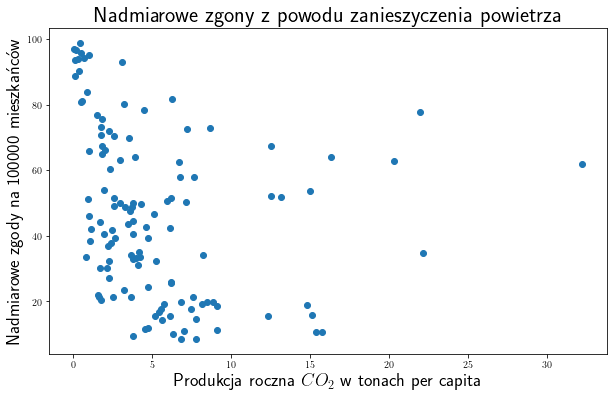

In [42]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.usetex' : True
})
plt.title("Nadmiarowe zgony z powodu zanieszyczenia powietrza", fontsize=22)
plt.xlabel("Produkcja roczna $CO_2$ w tonach per capita", fontsize=18)
plt.ylabel("Nadmiarowe zgody na 100000 mieszkańców", fontsize=18)
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(x=X, y=Y)
plt.savefig("co2_deaths.jpg", dpi=300)
plt.show()

In [35]:
print(X[4500:])

[]


In [36]:
X = np.expand_dims(X, axis=-1)
Y = np.expand_dims(Y, axis=-1)
print(X.shape)
print(Y.shape)

(123, 1)
(123, 1)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=49)

print(X_train.shape)

(98, 1)


In [38]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

print(reg.score(X_test, Y_test))


-0.06830401755008042


In [39]:
import matplotlib.pyplot as plt

lin = np.array(range())

plt.scatter(x=X, y=Y)
plt.line
plt.show()

TypeError: range expected 1 argument, got 0